This colab file is demo for Self Correction Human Parsing.
</br> Please select GPU as runtime before running the code

In [14]:
# 1. 修復 inplace_abn_cpu.cpp 中的錯誤
!sed -i 's/z.type()/z.scalar_type()/g' /content/Self-Correction-Human-Parsing/modules/src/inplace_abn_cpu.cpp

# 2. 修復 inplace_abn_cuda.cu 中的錯誤
!sed -i 's/the_type/the_type.scalar_type()/g' /content/Self-Correction-Human-Parsing/modules/src/inplace_abn_cuda.cu

In [11]:
# 1. 卸載現有的（您已經做過，但可以再執行一次確保乾淨）
!pip uninstall torch torchvision torchaudio -y

# 2. 嘗試安裝 PyTorch 2.1.0 (這是一個較新的版本，但可能還能編譯成功，且 Colab 資源庫可能保有此版本)
# 由於您原先是 cu12.6，我們嘗試一個較新的 CUDA 版本，例如 cu121
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121

# 3. 確認安裝成功
!python -c "import torch; print(torch.__version__); print(torch.cuda.is_available())"

Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu121
ERROR: Could not find a version that satisfies the requirement torch==2.1.0 (from versions: 2.2.0+cu121, 2.2.1+cu121, 2.2.2+cu121, 2.3.0+cu121, 2.3.1+cu121, 2.4.0+cu121, 2.4.1+cu121, 2.5.0+cu121, 2.5.1+cu121)
ERROR: No matching distribution found for torch==2.1.0
Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'torch'


In [12]:
# 確保我們使用的是一個有效的 PyTorch 版本
# 使用 Colab 內建的安裝方式，通常會安裝一個最新的穩定版。
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 129.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 112.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 103.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/1

In [1]:
!pip install ninja

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 5.7 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing
%cd Self-Correction-Human-Parsing
!mkdir checkpoints
!mkdir inputs
!mkdir outputs

Cloning into 'Self-Correction-Human-Parsing'...
remote: Enumerating objects: 722, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 722 (delta 74), reused 64 (delta 64), pack-reused 548 (from 2)
Receiving objects: 100% (722/722), 3.88 MiB | 9.33 MiB/s, done.
Resolving deltas: 100% (150/150), done.
/content/Self-Correction-Human-Parsing


Select dataset below

In [3]:
dataset = 'lip'         #select from ['lip', 'atr', 'pascal']

In [4]:
import gdown

if dataset == 'lip':
    url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
elif dataset == 'atr':
    url = 'https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP'
elif dataset == 'pascal':
    url = 'https://drive.google.com/uc?id=1E5YwNKW2VOEayK9mWCS3Kpsxf-3z04ZE'

output = 'checkpoints/final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
From (redirected): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH&confirm=t&uuid=3cf825ca-a5b2-4ca7-b196-9a054e5daf2a
To: /content/Self-Correction-Human-Parsing/checkpoints/final.pth
100%|██████████| 267M/267M [00:04<00:00, 54.5MB/s]


'checkpoints/final.pth'

In [5]:
#Please select images which you want to upload
%cd inputs
from google.colab import files
uploaded = files.upload()
%cd ..

/content/Self-Correction-Human-Parsing/inputs


Saving test2.jpg to test2.jpg
/content/Self-Correction-Human-Parsing


In [13]:
!python3 simple_extractor.py --dataset 'lip' --model-restore 'checkpoints/final.pth' --input-dir 'inputs' --output-dir 'outputs'

/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Evaluating total class number 20 with ['Background', 'Hat', 'Hair', 'Glove', 'Sunglasses', 'Upper-clothes', 'Dress', 'Coat', 'Socks', 'Pants', 'Jumpsuits', 'Scarf', 'Skirt', 'Face', 'Left-arm', 'Right-arm', 'Left-leg', 'Right-leg', 'Left-shoe', 'Right-shoe']
/content/Self-Correction-Human-Parsing/simple_extractor.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will 

--- 開始顯示 inputs 與 outputs 資料夾中的圖片 ---

=== 顯示輸入圖片 (Input Images) ===
檔案: test2.jpg


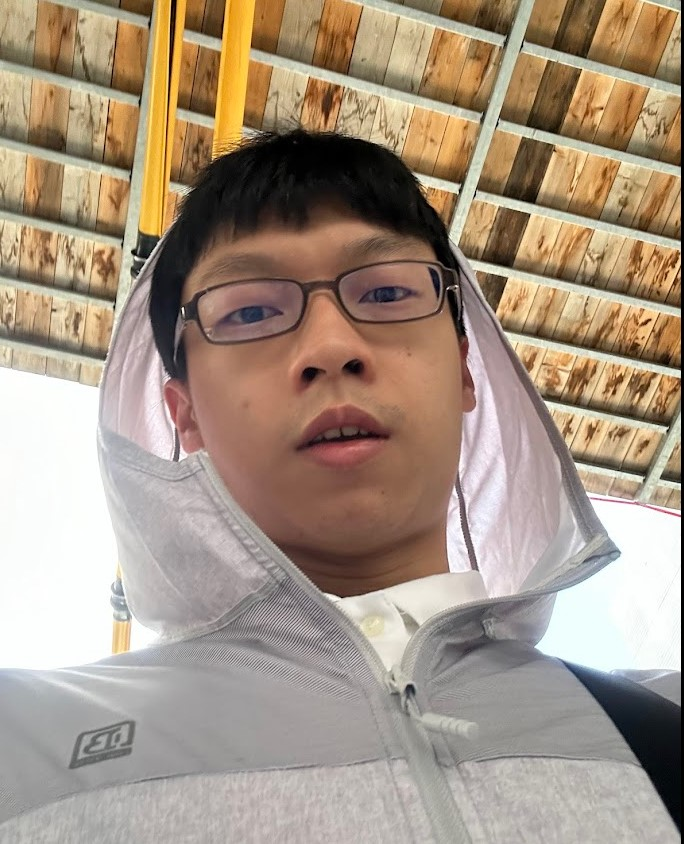


=== 顯示輸出圖片 (Output Segmentation Masks) ===
檔案: test2.png


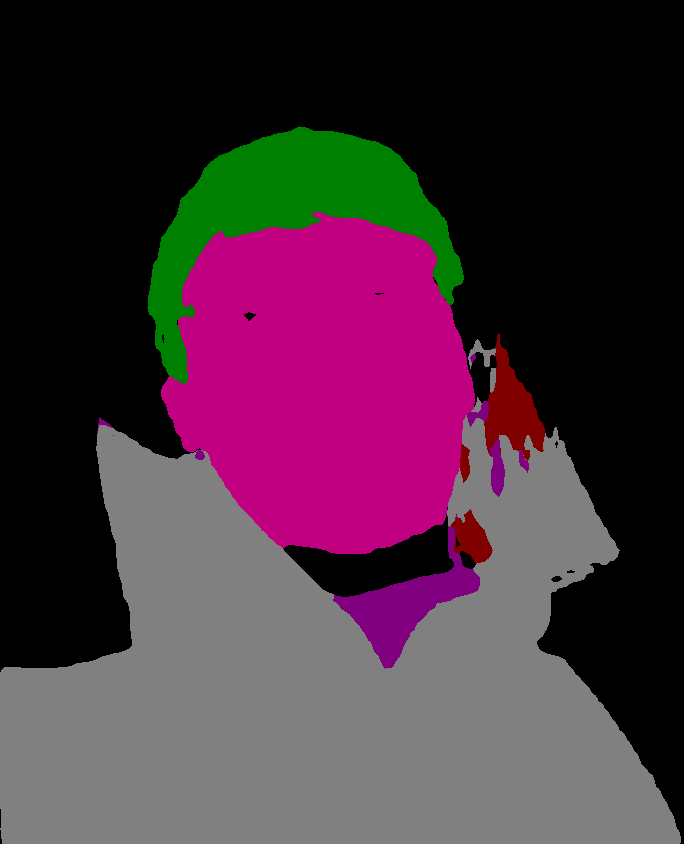


--- 圖片顯示完成 ---


In [15]:
import os
import glob
from IPython.display import Image, display

# 1. 定義輸出資料夾路徑
output_dir = 'outputs'
input_dir = 'inputs'
print(f"--- 開始顯示 {input_dir} 與 {output_dir} 資料夾中的圖片 ---")

# 2. 查找資料夾中所有的 .png 或 .jpg 圖片檔案
image_files_o = glob.glob(os.path.join(output_dir, '*.*')) # 查找所有副檔名
image_files_i = glob.glob(os.path.join(input_dir, '*.*')) # 查找所有副檔名

# 3. 遍歷並顯示輸入圖片
print("\n=== 顯示輸入圖片 (Input Images) ===")
if not image_files_i:
    print("❌ 找不到任何輸入圖片。請確認 'inputs' 資料夾中是否有圖片。")
for file_path in image_files_i:
    # 這裡確保只顯示常見的圖片格式
    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        print(f"檔案: {os.path.basename(file_path)}")
        display(Image(filename=file_path))

# 4. 遍歷並顯示輸出圖片
print("\n=== 顯示輸出圖片 (Output Segmentation Masks) ===")
if not image_files_o:
    print("❌ 找不到任何輸出圖片。請確認模型運行是否成功將圖片寫入 'outputs' 資料夾。")
for file_path in image_files_o:
    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        print(f"檔案: {os.path.basename(file_path)}")
        display(Image(filename=file_path))

print("\n--- 圖片顯示完成 ---")

# Download the generated images from *outputs* folder